In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import glob


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.autolayout'] = True

In [3]:
%matplotlib inline

In [4]:
def summarize_data_rs(ndre,ndvi,savi):
    '''
    ndre,ndvi,savi : Dataframes 
    
    Returns weekly summarized merged dataframes
    '''
    
    #Renaming columns
    ndvi.rename(columns={"system:time_start": "Date"}, inplace=True)
    savi.rename(columns={"system:time_start": "Date"}, inplace=True)
    ndre.rename(columns={"system:time_start": "Date"}, inplace=True)
    
    
    #type conversion to datetime
    df_ndvi['Date'] = pd.to_datetime(df_ndvi['Date'])
    df_savi['Date'] = pd.to_datetime(df_savi['Date'])
    df_ndre['Date'] = pd.to_datetime(df_ndre['Date'])
    
    
    #Set Date as Index of the dataframe
    savi.set_index('Date', inplace=True)
    ndre.set_index('Date', inplace=True)
    ndvi.set_index('Date', inplace=True)
    
    #Summarize by 1 Week
    ndvi_weekly = ndvi.groupby(pd.Grouper(freq='1W'))
    ndre_weekly = ndre.groupby(pd.Grouper(freq='1W'))
    savi_weekly = savi.groupby(pd.Grouper(freq='1W'))
    
    ndre_mean = ndre_weekly.mean()
    ndvi_mean = ndvi_weekly.mean()
    savi_mean = savi_weekly.mean()
    
    #Merged all the dataframes on 'Date'
    df_tmp = pd.merge(ndvi_mean,savi_mean, on = 'Date')
    df_final = pd.merge(df_tmp,ndre_mean, on = 'Date')
    
    
    return df_final

In [5]:
def summarized_data_wp(df):
    df.rename(columns={"YEAR_MO_DY": "Date"}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])Toamto Yield 
    df.set_index('Date',inplace=True)
    return df

In [6]:
data_path = list(pathlib.Path('Data').glob('*'))


In [7]:
print(data_path)

[PosixPath('Data/Jhajjar'), PosixPath('Data/Jind'), PosixPath('Data/Yamuna Nagar'), PosixPath('Data/Kaithal'), PosixPath('Data/Ambala'), PosixPath('Data/Bhiwani'), PosixPath('Data/Sirsa'), PosixPath('Data/Rewari'), PosixPath('Data/Panipat'), PosixPath('Data/Sonepat'), PosixPath('Data/Faridabad'), PosixPath('Data/Panchkula'), PosixPath('Data/Kurukshetra'), PosixPath('Data/Hisar'), PosixPath('Data/Gurgaon'), PosixPath('Data/Karnal'), PosixPath('Data/Fatehabad'), PosixPath('Data/Mahendragarh'), PosixPath('Data/Rohtak')]


In [8]:
final_df = pd.DataFrame()

In [9]:
from pathlib import Path

#Iterate over all the disctricts
for item in data_path:
    print(f"Item : {item}")
    file_path =list(pathlib.Path(item).glob('*'))
    file_path.sort()
    file_parts = file_path[0].parts
    
    locations_file = file_path[1]
    ndre_file = file_path[2]
    ndvi_file = file_path[3]
    savi_file = file_path[4]
    weather_file=file_path[5]
    
    
    
    df_ndvi = pd.read_csv(ndvi_file)
    df_ndre = pd.read_csv(ndre_file)
    df_savi = pd.read_csv(savi_file)
    df_weather=pd.read_csv(weather_file,skiprows=12,parse_dates=[["YEAR","MO","DY"]])
   
    
    summarized_df = summarize_data_rs(df_ndre,df_ndvi,df_savi)
    summarized_df['District Name'] = file_parts[-2]
    
   
    #writing weather parameters
    weather_data_df=summarized_data_wp(df_weather)
    
    
    #Merge final_df and weather_data_df on "Date"
    tmp_df = pd.merge(summarized_df,weather_data_df,left_index=True,right_index=True)
    
    
    final_df = pd.concat([final_df,tmp_df])
    
    #final_df.to_csv("final_df.csv")

Item : Data/Jhajjar


ValueError: Missing column provided to 'parse_dates': 'DY, MO, YEAR'

In [9]:
final_df.shape

(3532, 9)

In [10]:
final_df['District Name'].unique()

array(['Ambala', 'Bhiwani', 'Faridabad', 'Fatehabad', 'Gurgaon', 'Hisar',
       'Jhajjar', 'Jind', 'Kaithal', 'Karnal', 'Kurukshetra',
       'Mahendragarh', 'Panchkula', 'Panipat', 'Rewari', 'Rohtak',
       'Sirsa', 'Sonepat', 'Yamuna Nagar'], dtype=object)

In [11]:
final_df.columns

Index(['ndvi', 'savi', 'ndre', 'District Name', 'PRECTOTCORR', 'TS', 'T2M_MAX',
       'T2M_MIN', 'ALLSKY_SFC_PAR_TOT'],
      dtype='object')

In [12]:
final_df.head()

,ndvi,savi,ndre,District Name,PRECTOTCORR,TS,T2M_MAX,T2M_MIN,ALLSKY_SFC_PAR_TOT
Date,,,,,,,,,
2018-12-16,0.5155,0.2945,0.3215,Ambala,0.00,10.87,21.61,8.05,72.62
2018-12-23,0.4030,0.2440,0.2560,Ambala,0.00,8.52,19.05,6.08,62.54
2018-12-30,0.3730,0.2385,0.2535,Ambala,0.00,7.86,18.87,7.06,59.80
2019-01-06,0.5010,0.2970,0.3120,Ambala,2.03,9.43,13.53,8.51,25.16
2019-01-13,NaN,NaN,NaN,Ambala,1.06,11.50,19.47,7.18,55.32


In [13]:
final_df.tail()

,ndvi,savi,ndre,District Name,PRECTOTCORR,TS,T2M_MAX,T2M_MIN,ALLSKY_SFC_PAR_TOT
Date,,,,,,,,,
2021-09-12,0.100,0.0750,0.024,Yamuna Nagar,12.06,24.62,28.41,21.27,59.52
2021-09-19,0.772,0.4775,0.516,Yamuna Nagar,6.44,24.84,28.59,21.74,90.15
2021-09-26,0.555,0.3715,0.354,Yamuna Nagar,0.39,23.73,27.51,20.51,108.22
2021-10-03,0.227,0.1330,0.112,Yamuna Nagar,0.00,23.42,28.34,20.08,107.37
2021-10-10,0.589,0.3650,0.364,Yamuna Nagar,0.00,22.18,30.22,16.99,105.62


# Data Preprocessing

In [14]:
final_df.replace(-999, np.nan, inplace=True)

In [15]:
final_df.shape

(3532, 9)

In [16]:
final_df.isna().sum()

ndvi                  685
savi                  685
ndre                  685
District Name           0
PRECTOTCORR            12
TS                     12
T2M_MAX                12
T2M_MIN                12
ALLSKY_SFC_PAR_TOT    480
dtype: int64

In [17]:
final_df.head()

,ndvi,savi,ndre,District Name,PRECTOTCORR,TS,T2M_MAX,T2M_MIN,ALLSKY_SFC_PAR_TOT
Date,,,,,,,,,
2018-12-16,0.5155,0.2945,0.3215,Ambala,0.00,10.87,21.61,8.05,72.62
2018-12-23,0.4030,0.2440,0.2560,Ambala,0.00,8.52,19.05,6.08,62.54
2018-12-30,0.3730,0.2385,0.2535,Ambala,0.00,7.86,18.87,7.06,59.80
2019-01-06,0.5010,0.2970,0.3120,Ambala,2.03,9.43,13.53,8.51,25.16
2019-01-13,NaN,NaN,NaN,Ambala,1.06,11.50,19.47,7.18,55.32


In [18]:
final_df.dropna(inplace=True)

In [19]:
final_df

,ndvi,savi,ndre,District Name,PRECTOTCORR,TS,T2M_MAX,T2M_MIN,ALLSKY_SFC_PAR_TOT
Date,,,,,,,,,
2018-12-16,0.5155,0.2945,0.3215,Ambala,0.00,10.87,21.61,8.05,72.62
2018-12-23,0.4030,0.2440,0.2560,Ambala,0.00,8.52,19.05,6.08,62.54
2018-12-30,0.3730,0.2385,0.2535,Ambala,0.00,7.86,18.87,7.06,59.80
2019-01-06,0.5010,0.2970,0.3120,Ambala,2.03,9.43,13.53,8.51,25.16
2019-01-27,0.4180,0.2850,0.2920,Ambala,0.31,8.12,16.52,4.58,49.37
...,...,...,...,...,...,...,...,...,...
2021-09-12,0.1000,0.0750,0.0240,Yamuna Nagar,12.06,24.62,28.41,21.27,59.52
2021-09-19,0.7720,0.4775,0.5160,Yamuna Nagar,6.44,24.84,28.59,21.74,90.15
2021-09-26,0.5550,0.3715,0.3540,Yamuna Nagar,0.39,23.73,27.51,20.51,108.22


# Plotting

District Name
Ambala          AxesSubplot(0.125,0.2;0.775x0.68)
Bhiwani         AxesSubplot(0.125,0.2;0.775x0.68)
Faridabad       AxesSubplot(0.125,0.2;0.775x0.68)
Fatehabad       AxesSubplot(0.125,0.2;0.775x0.68)
Gurgaon         AxesSubplot(0.125,0.2;0.775x0.68)
Hisar           AxesSubplot(0.125,0.2;0.775x0.68)
Jhajjar         AxesSubplot(0.125,0.2;0.775x0.68)
Jind            AxesSubplot(0.125,0.2;0.775x0.68)
Kaithal         AxesSubplot(0.125,0.2;0.775x0.68)
Karnal          AxesSubplot(0.125,0.2;0.775x0.68)
Kurukshetra     AxesSubplot(0.125,0.2;0.775x0.68)
Mahendragarh    AxesSubplot(0.125,0.2;0.775x0.68)
Panchkula       AxesSubplot(0.125,0.2;0.775x0.68)
Panipat         AxesSubplot(0.125,0.2;0.775x0.68)
Rewari          AxesSubplot(0.125,0.2;0.775x0.68)
Rohtak          AxesSubplot(0.125,0.2;0.775x0.68)
Sirsa           AxesSubplot(0.125,0.2;0.775x0.68)
Sonepat         AxesSubplot(0.125,0.2;0.775x0.68)
Yamuna Nagar    AxesSubplot(0.125,0.2;0.775x0.68)
Name: ndvi, dtype: object

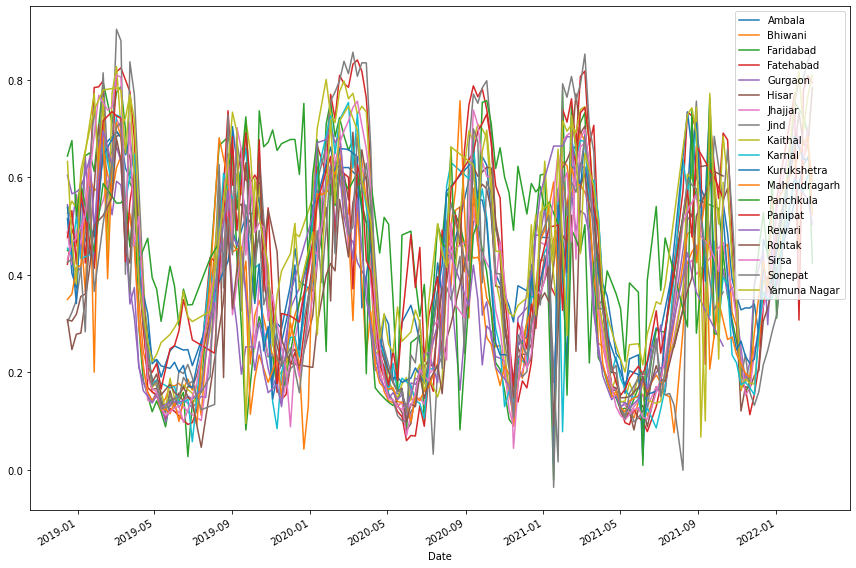

In [20]:
final_df.groupby('District Name')['ndvi'].plot(figsize= (12,8),legend=True)

District Name
Ambala          AxesSubplot(0.125,0.2;0.775x0.68)
Bhiwani         AxesSubplot(0.125,0.2;0.775x0.68)
Faridabad       AxesSubplot(0.125,0.2;0.775x0.68)
Fatehabad       AxesSubplot(0.125,0.2;0.775x0.68)
Gurgaon         AxesSubplot(0.125,0.2;0.775x0.68)
Hisar           AxesSubplot(0.125,0.2;0.775x0.68)
Jhajjar         AxesSubplot(0.125,0.2;0.775x0.68)
Jind            AxesSubplot(0.125,0.2;0.775x0.68)
Kaithal         AxesSubplot(0.125,0.2;0.775x0.68)
Karnal          AxesSubplot(0.125,0.2;0.775x0.68)
Kurukshetra     AxesSubplot(0.125,0.2;0.775x0.68)
Mahendragarh    AxesSubplot(0.125,0.2;0.775x0.68)
Panchkula       AxesSubplot(0.125,0.2;0.775x0.68)
Panipat         AxesSubplot(0.125,0.2;0.775x0.68)
Rewari          AxesSubplot(0.125,0.2;0.775x0.68)
Rohtak          AxesSubplot(0.125,0.2;0.775x0.68)
Sirsa           AxesSubplot(0.125,0.2;0.775x0.68)
Sonepat         AxesSubplot(0.125,0.2;0.775x0.68)
Yamuna Nagar    AxesSubplot(0.125,0.2;0.775x0.68)
Name: TS, dtype: object

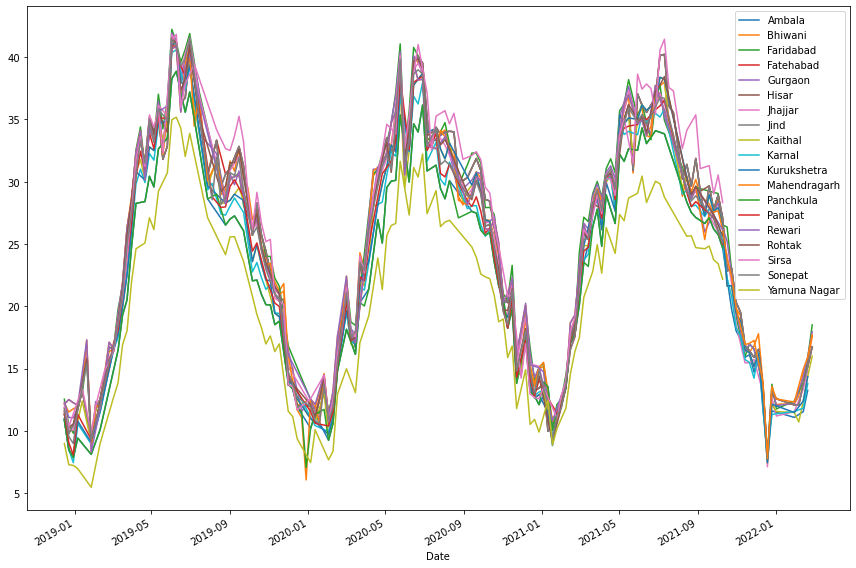

In [21]:
final_df.groupby('District Name')['TS'].plot(figsize= (12,8),legend=True)

In [22]:
final_df.columns

Index(['ndvi', 'savi', 'ndre', 'District Name', 'PRECTOTCORR', 'TS', 'T2M_MAX',
       'T2M_MIN', 'ALLSKY_SFC_PAR_TOT'],
      dtype='object')

In [23]:
final_df.rename(columns={"PRECTOTCORR": "Rainfall", "TS" : "Skin_Tmp", "T2M_MAX" : "Max_Tmp", "T2M_MIN" : "Min_Tmp", "ALLSKY_SFC_PAR_TOT": "APAR"}, inplace=True)

In [24]:
final_df.head()

,ndvi,savi,ndre,District Name,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR
Date,,,,,,,,,
2018-12-16,0.5155,0.2945,0.3215,Ambala,0.00,10.87,21.61,8.05,72.62
2018-12-23,0.4030,0.2440,0.2560,Ambala,0.00,8.52,19.05,6.08,62.54
2018-12-30,0.3730,0.2385,0.2535,Ambala,0.00,7.86,18.87,7.06,59.80
2019-01-06,0.5010,0.2970,0.3120,Ambala,2.03,9.43,13.53,8.51,25.16
2019-01-27,0.4180,0.2850,0.2920,Ambala,0.31,8.12,16.52,4.58,49.37


In [25]:
final_df.to_csv('final_dataset.csv')

# Yield Data Preparation

In [151]:
df_independent = pd.read_csv('final_dataset.csv')

In [152]:
df_independent.head()

,Date,ndvi,savi,ndre,District Name,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR
0,2018-12-16,0.5155,0.2945,0.3215,Ambala,0.00,10.87,21.61,8.05,72.62
1,2018-12-23,0.4030,0.2440,0.2560,Ambala,0.00,8.52,19.05,6.08,62.54
2,2018-12-30,0.3730,0.2385,0.2535,Ambala,0.00,7.86,18.87,7.06,59.80
3,2019-01-06,0.5010,0.2970,0.3120,Ambala,2.03,9.43,13.53,8.51,25.16
4,2019-01-27,0.4180,0.2850,0.2920,Ambala,0.31,8.12,16.52,4.58,49.37


In [153]:
df_independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2449 non-null   object 
 1   ndvi           2449 non-null   float64
 2   savi           2449 non-null   float64
 3   ndre           2449 non-null   float64
 4   District Name  2449 non-null   object 
 5   Rainfall       2449 non-null   float64
 6   Skin_Tmp       2449 non-null   float64
 7   Max_Tmp        2449 non-null   float64
 8   Min_Tmp        2449 non-null   float64
 9   APAR           2449 non-null   float64
dtypes: float64(8), object(2)
memory usage: 191.5+ KB


In [154]:
df_independent['Date'] = pd.to_datetime(df_independent['Date'])

In [155]:
df_independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2449 non-null   datetime64[ns]
 1   ndvi           2449 non-null   float64       
 2   savi           2449 non-null   float64       
 3   ndre           2449 non-null   float64       
 4   District Name  2449 non-null   object        
 5   Rainfall       2449 non-null   float64       
 6   Skin_Tmp       2449 non-null   float64       
 7   Max_Tmp        2449 non-null   float64       
 8   Min_Tmp        2449 non-null   float64       
 9   APAR           2449 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 191.5+ KB


In [159]:
df_independent['Year'] = pd.DatetimeIndex(df_independent['Date']).year

In [160]:
df_independent.head()

,Date,ndvi,savi,ndre,District Name,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR,Year
0,2018-12-16,0.5155,0.2945,0.3215,Ambala,0.00,10.87,21.61,8.05,72.62,2018
1,2018-12-23,0.4030,0.2440,0.2560,Ambala,0.00,8.52,19.05,6.08,62.54,2018
2,2018-12-30,0.3730,0.2385,0.2535,Ambala,0.00,7.86,18.87,7.06,59.80,2018
3,2019-01-06,0.5010,0.2970,0.3120,Ambala,2.03,9.43,13.53,8.51,25.16,2019
4,2019-01-27,0.4180,0.2850,0.2920,Ambala,0.31,8.12,16.52,4.58,49.37,2019


In [161]:
df_independent.set_index(['District Name','Year'], inplace=True)
df_independent.head()

Date    ndvi    savi    ndre  Rainfall  Skin_Tmp  \
District Name Year                                                          
Ambala        2018 2018-12-16  0.5155  0.2945  0.3215      0.00     10.87   
              2018 2018-12-23  0.4030  0.2440  0.2560      0.00      8.52   
              2018 2018-12-30  0.3730  0.2385  0.2535      0.00      7.86   
              2019 2019-01-06  0.5010  0.2970  0.3120      2.03      9.43   
              2019 2019-01-27  0.4180  0.2850  0.2920      0.31      8.12   

                    Max_Tmp  Min_Tmp   APAR  
District Name Year                           
Ambala        2018    21.61     8.05  72.62  
              2018    19.05     6.08  62.54  
              2018    18.87     7.06  59.80  
              2019    13.53     8.51  25.16  
              2019    16.52     4.58  49.37

In [162]:
df_independent.tail()

Date   ndvi    savi   ndre  Rainfall  Skin_Tmp  \
District Name Year                                                        
Yamuna Nagar  2021 2021-09-12  0.100  0.0750  0.024     12.06     24.62   
              2021 2021-09-19  0.772  0.4775  0.516      6.44     24.84   
              2021 2021-09-26  0.555  0.3715  0.354      0.39     23.73   
              2021 2021-10-03  0.227  0.1330  0.112      0.00     23.42   
              2021 2021-10-10  0.589  0.3650  0.364      0.00     22.18   

                    Max_Tmp  Min_Tmp    APAR  
District Name Year                            
Yamuna Nagar  2021    28.41    21.27   59.52  
              2021    28.59    21.74   90.15  
              2021    27.51    20.51  108.22  
              2021    28.34    20.08  107.37  
              2021    30.22    16.99  105.62

In [283]:
df_independent.index

MultiIndex([(      'Ambala', 2018),
            (      'Ambala', 2018),
            (      'Ambala', 2018),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            ...
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021)],
           names=['District Name', 'Year'], length=2449)

In [264]:
yield_data = list(pathlib.Path('Yield_Data').glob('*'))
yield_data.sort()
yield_data

[PosixPath('Yield_Data/Yield_data_16_17.xls'),
 PosixPath('Yield_Data/Yield_data_17_18.xls'),
 PosixPath('Yield_Data/Yield_data_18_19.xls'),
 PosixPath('Yield_Data/Yield_data_19_20.xls'),
 PosixPath('Yield_Data/Yield_data_20_21.xls')]

In [281]:
for item in yield_data[:1]:
    
    df = pd.read_excel(item)
    
    df.set_index(['District Name','Year'], inplace=True)
    tmp_dict = df.to_dict('index')
   
    
    for key,values in tmp_dict.items():
        
        #print(values)
        tmp_df = pd.DataFrame.from_dict([values])
        #print(tmp_df.head())
        
    

In [282]:
tmp_df.head()

,Potato Area,Potato Prod,Onino Area,Onion Prod,Tomato Area,Tomato Prod,Tomato_b_Area,Tomato_b_Prod,Radish Area,Radish Prod,Carrot Area,Carrot Prod,Cabbage Area,Cabbage Prod,Cauliflawer Area,Cauliflower Prod
0,1041,24507,945,20631,1441,23799,0.0,0,656,12790,1050,18027,850,15199,997,17533


In [270]:
df_independent.index

MultiIndex([(      'Ambala', 2018),
            (      'Ambala', 2018),
            (      'Ambala', 2018),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            (      'Ambala', 2019),
            ...
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021),
            ('Yamuna Nagar', 2021)],
           names=['District Name', 'Year'], length=2449)

In [268]:
df.to_dict('index')

{('Panchkula', 2021): {'Potato Area': 905,
  'Potato Yield': 27.76795580110497,
  'Potato Prod': 25130,
  'Tomato Area': 178,
  'Tomato Yield': 25.50561797752809,
  'Tomato Prod': 4540,
  'Tomato_b_Area': 2.4,
  'Tomato_b_Yield': 62.5,
  'Tomato_b_prod': 150,
  'Radish Area': 358,
  'Radish Yield': 24.441340782122904,
  'Radish Prod': 8750,
  'Carrot Area': 214,
  'Carrot Yield': 7.429906542056075,
  'Carrot Prod': 1590,
  'Cabbage Area': 78,
  'Cabbage Yield': 13.846153846153847,
  'Cabbage Prod': 1080,
  'Cauliflower Area': 226,
  'Cauliflower Yield': 11.172566371681416,
  'Cauliflower Prod': 2525},
 ('Ambala', 2021): {'Potato Area': 3610,
  'Potato Yield': 26.51634349030471,
  'Potato Prod': 95724,
  'Tomato Area': 910,
  'Tomato Yield': 28.41318681318681,
  'Tomato Prod': 25856,
  'Tomato_b_Area': 1.0,
  'Tomato_b_Yield': 178.0,
  'Tomato_b_prod': 178,
  'Radish Area': 1944,
  'Radish Yield': 27.694444444444443,
  'Radish Prod': 53838,
  'Carrot Area': 1614,
  'Carrot Yield': 23.43

# Merging 

In [284]:
df_independent.head()

Date    ndvi    savi    ndre  Rainfall  Skin_Tmp  \
District Name Year                                                          
Ambala        2018 2018-12-16  0.5155  0.2945  0.3215      0.00     10.87   
              2018 2018-12-23  0.4030  0.2440  0.2560      0.00      8.52   
              2018 2018-12-30  0.3730  0.2385  0.2535      0.00      7.86   
              2019 2019-01-06  0.5010  0.2970  0.3120      2.03      9.43   
              2019 2019-01-27  0.4180  0.2850  0.2920      0.31      8.12   

                    Max_Tmp  Min_Tmp   APAR  
District Name Year                           
Ambala        2018    21.61     8.05  72.62  
              2018    19.05     6.08  62.54  
              2018    18.87     7.06  59.80  
              2019    13.53     8.51  25.16  
              2019    16.52     4.58  49.37

In [285]:
df_yield = pd.read_csv('yield_merged.csv')

In [286]:
df_yield.head()

,Unnamed: 0,District Name,Potato_Yield,Tomato_Yield,Tomato_b_Yield,Radish_Yield,Carrot_Yield,Cabbage_Yield,Cauliflower_Yield,Year
0,0,Panchkula,21.734554,20.854545,47.5,15.470019,15.912195,17.704918,17.011887,2017
1,1,Ambala,23.558722,29.275152,49.0,12.461162,15.516484,12.717456,13.800344,2017
2,2,Yamuna Nagar,20.878521,27.277778,NaN,13.782979,14.434783,21.643836,15.204276,2017
3,3,Kurukshetra,26.653450,5.989583,40.0,8.791667,12.572816,10.935593,14.972897,2017
4,4,Kaithal,24.989293,15.764103,70.0,15.088889,14.652406,17.448571,15.392670,2017


In [287]:
df_yield.set_index(['District Name', 'Year'], inplace=True)

In [290]:
df_yield.columns

Index(['Unnamed: 0', 'Potato_Yield', 'Tomato_Yield', 'Tomato_b_Yield',
       'Radish_Yield', 'Carrot_Yield', 'Cabbage_Yield', 'Cauliflower_Yield'],
      dtype='object')

In [291]:
df_yield.drop(['Unnamed: 0'], axis=1)

,,Potato_Yield,Tomato_Yield,Tomato_b_Yield,Radish_Yield,Carrot_Yield,Cabbage_Yield,Cauliflower_Yield
District Name,Year,,,,,,,
Panchkula,2017,21.734554,20.854545,47.500000,15.470019,15.912195,17.704918,17.011887
Ambala,2017,23.558722,29.275152,49.000000,12.461162,15.516484,12.717456,13.800344
Yamuna Nagar,2017,20.878521,27.277778,NaN,13.782979,14.434783,21.643836,15.204276
Kurukshetra,2017,26.653450,5.989583,40.000000,8.791667,12.572816,10.935593,14.972897
Kaithal,2017,24.989293,15.764103,70.000000,15.088889,14.652406,17.448571,15.392670
...,...,...,...,...,...,...,...,...
Bhiwani,2021,22.928125,13.026380,70.147059,19.271978,9.666667,11.443820,15.177914
Hisar,2021,25.000000,10.000000,0.000000,24.389423,17.821622,6.904762,14.422318
Fatehabad,2021,27.256637,21.528455,0.000000,9.818182,17.008621,19.640000,11.968740


In [294]:
result = pd.merge(df_independent,df_yield, on=['District Name','Year'])

In [295]:
result.to_csv("final_training_dataset.csv")